In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Задача 1 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за Y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

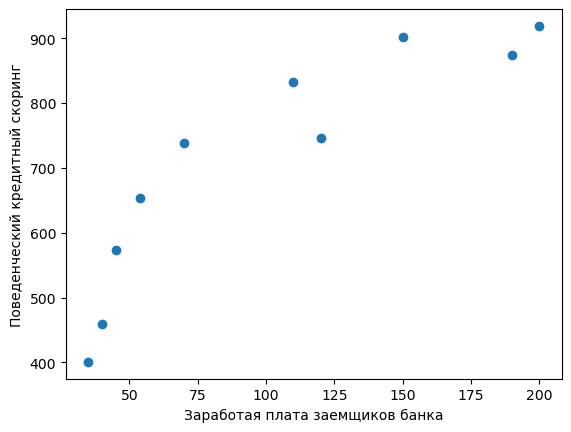

In [4]:
plt.scatter(zp, ks)
plt.xlabel('Заработая плата заемщиков банка')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()

Исходя из графика наблюдаем линейную взаимосвязь

In [5]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
print(f'{b:.3f}')

2.621


In [6]:
a = np.mean(ks) - b * np.mean(zp)
print(f'{a:.3f}')

444.177


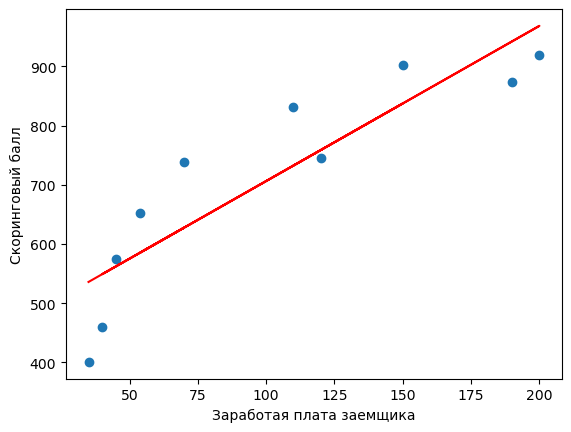

In [9]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, c = 'red')
plt.xlabel('Заработая плата заемщикa')
plt.ylabel('Скоринговый балл', rotation = 90)
plt.show()

Исходя их графика явно прослеживается линейную взаимосвязь между величиной заработной платы и значением скорингового балла

#### Задача 2 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Находим коэффициент b из предыдущей задачи, затем вычислим производную функцию потерь

In [14]:
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [16]:
def mse_p(b,x,y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [24]:
alpha = 1e-6
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b
iteration = 10000
for i in range(iteration):
    b -= alpha * mse_p(b, zp, ks)
    if i % 100 == 0:
        print(f'Итерация №{i}, b = {b:.3f}, mse = {mse(b, zp, ks):.3f}')
    if mse(b, zp, ks) > mse_min:
        print(f'Итерация №{i_min}, b = {b_min:.3f}, mse = {mse_min:.3f},\nПолучаем минимальное значение: {b_min:.3f} ')
        break
    else:
        mse_min = mse(b,zp,ks)
        i_min = i
        b_min = b

Итерация №0, b = 0.260, mse = 493237.721
Итерация №100, b = 5.545, mse = 58151.318
Итерация №200, b = 5.869, mse = 56522.976
Итерация №300, b = 5.889, mse = 56516.881
Итерация №400, b = 5.890, mse = 56516.859
Итерация №500, b = 5.890, mse = 56516.858
Итерация №600, b = 5.890, mse = 56516.858
Итерация №628, b = 5.890, mse = 56516.858,
Получаем минимальное значение: 5.890 


#### Задача 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Создаем функцию потерь

In [25]:
def mse_ab(a,b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

Создаем частные производные функции потерь по a и b

In [28]:
def mse_a(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

In [29]:
def mse_b(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [35]:
alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000   
for i in range(iteration):
    a -= alpha * mse_a(a, b, zp, ks)
    b -= alpha * mse_b(a, b, zp, ks)
    if i % 50000 == 0:
        print(f'Итерация № {i}, a = {a:.3f}, b = {b:.3f}, mse = {mse_ab(a, b, zp, ks):.3f}')
    if mse_ab(a, b, zp, ks) > mseab_min:
        print(f'Итерация №{i_min}, a = {a_min:.3f}, b = {b_min:.3f}, mse = {mseab_min:.3f},\nПолучено минимальное значение')
        break
    else:
        mseab_min = mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'a = {a_min:.3f}\nb = {b_min:.3f}')

Итерация № 0, a = 0.142, b = 4.885, mse = 70366.282
Итерация № 50000, a = 236.727, b = 4.147, mse = 17387.096
Итерация № 100000, a = 347.256, b = 3.334, mse = 8853.283
Итерация № 150000, a = 398.895, b = 2.954, mse = 6990.542
Итерация № 200000, a = 423.022, b = 2.776, mse = 6583.946
Итерация № 250000, a = 434.293, b = 2.693, mse = 6495.196
Итерация № 300000, a = 439.560, b = 2.655, mse = 6475.823
Итерация № 350000, a = 442.020, b = 2.636, mse = 6471.595
Итерация № 400000, a = 443.169, b = 2.628, mse = 6470.672
Итерация № 450000, a = 443.706, b = 2.624, mse = 6470.470
Итерация № 500000, a = 443.957, b = 2.622, mse = 6470.426
Итерация № 550000, a = 444.075, b = 2.621, mse = 6470.417
Итерация № 600000, a = 444.129, b = 2.621, mse = 6470.415
Итерация № 650000, a = 444.155, b = 2.621, mse = 6470.414
Итерация № 700000, a = 444.167, b = 2.621, mse = 6470.414
Итерация № 750000, a = 444.172, b = 2.621, mse = 6470.414
Итерация № 800000, a = 444.175, b = 2.621, mse = 6470.414
Итерация №848812, a 

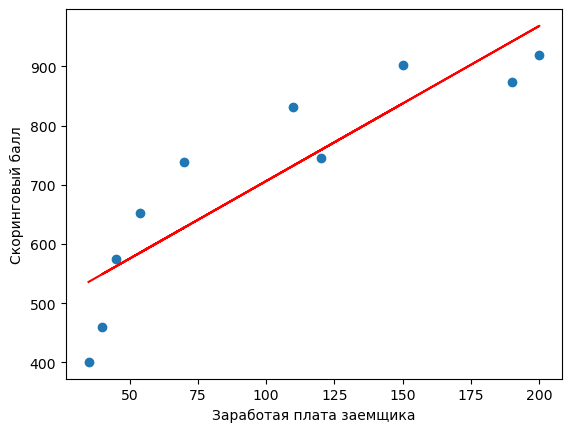

In [36]:
plt.scatter(zp, ks)
plt.plot(zp, a_min + b_min * zp, c = 'red')
plt.xlabel('Заработая плата заемщика')
plt.ylabel('Скоринговый балл', rotation = 90)
plt.show()